<a href="https://colab.research.google.com/github/jude6649/Data-science-projects/blob/main/Project_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Dependencies**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import seaborn as sns

**Data collection and processing**

In [ ]:
house_data = pd.read_csv('/House Price Prediction Dataset.csv')

In [ ]:
house_data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


**Label encoding**


In [ ]:
from sklearn.preprocessing import LabelEncoder
lebel_encoder = LabelEncoder()

In [ ]:
columns_to_encode = ['Location','Condition','Garage']
for column in columns_to_encode:
    house_data[column] = lebel_encoder.fit_transform(house_data[column])


**Categorical features**


In [ ]:
house_data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,0,0,0,149919
1,2,4272,5,4,3,1958,0,0,0,424998
2,3,3592,2,2,3,1938,0,2,0,266746
3,4,966,4,2,2,1902,2,1,1,244020
4,5,4926,1,4,2,1975,0,1,1,636056


In [ ]:
house_data.shape

(2000, 10)

In [ ]:
house_data.isnull().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [ ]:
house_data.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,1.447500,1.482000,0.481000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,1.136173,1.126193,0.499764,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,0.000000,0.000000,0.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,0.000000,0.000000,0.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,1.000000,1.000000,0.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,2.000000,3.000000,1.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,3.000000,3.000000,1.000000,999656.000000


In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id         2000 non-null   int64
 1   Area       2000 non-null   int64
 2   Bedrooms   2000 non-null   int64
 3   Bathrooms  2000 non-null   int64
 4   Floors     2000 non-null   int64
 5   YearBuilt  2000 non-null   int64
 6   Location   2000 non-null   int64
 7   Condition  2000 non-null   int64
 8   Garage     2000 non-null   int64
 9   Price      2000 non-null   int64
dtypes: int64(10)
memory usage: 156.4 KB


**Splitting features and target**

In [ ]:
x = house_data.drop(['Price'],axis=1)
y = house_data['Price']

In [ ]:
print(x)

        Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0        1  1360         5          4       3       1970         0          0   
1        2  4272         5          4       3       1958         0          0   
2        3  3592         2          2       3       1938         0          2   
3        4   966         4          2       2       1902         2          1   
4        5  4926         1          4       2       1975         0          1   
...    ...   ...       ...        ...     ...        ...       ...        ...   
1995  1996  4994         5          4       3       1923         2          3   
1996  1997  3046         5          2       1       2019         2          3   
1997  1998  1062         5          1       2       1903         1          3   
1998  1999  4062         3          1       2       1936         3          0   
1999  2000  2989         5          1       3       1903         2          1   

      Garage  
0          0

In [ ]:
print(y)

0       149919
1       424998
2       266746
3       244020
4       636056
         ...  
1995    295620
1996    580929
1997    476925
1998    161119
1999    482525
Name: Price, Length: 2000, dtype: int64


**Splitting data into training and testing data**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x_train)

        Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
333    334  3338         2          2       1       1927         1          1   
721    722  1563         4          2       3       1915         2          3   
1352  1353  2480         4          2       1       2012         0          3   
1680  1681  1443         2          3       3       1925         1          2   
156    157  4010         4          2       1       2005         1          0   
...    ...   ...       ...        ...     ...        ...       ...        ...   
1558  1559  2712         5          4       2       1999         2          3   
1608  1609  4681         3          3       2       1969         0          0   
493    494  4022         4          1       1       1937         1          1   
527    528  4137         4          1       2       1968         3          3   
1192  1193  4064         4          4       2       1957         3          0   

      Garage  
333        1

In [ ]:
print(y_train)

333     468161
721     961848
1352    397509
1680    713227
156     558252
         ...  
1558    839981
1608    174451
493     817469
527     477894
1192    934750
Name: Price, Length: 1600, dtype: int64


In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1600, 9) (400, 9) (1600,) (400,)


**Machine learning model training**

In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

**Model evaluation**

In [ ]:
training_data_prediction = regressor.predict(x_train)
r2_train = metrics.r2_score(y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.9602556824684143


In [ ]:
test_data_prediction = regressor.predict(x_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)


In [ ]:
print('R Squared value = ', r2_test)

R Squared value =  -0.3279457092285156


**Prediction of data**

In [ ]:
x = (1,1360,5,4,3,1970,0,0,0)
x = np.asarray(x)
x = x.reshape(1,-1)
prediction = regressor.predict(x)
print(prediction)
print('House price is',prediction[0])






[156132.53]
House price is 156132.53


**Visualization of data**

<Axes: >

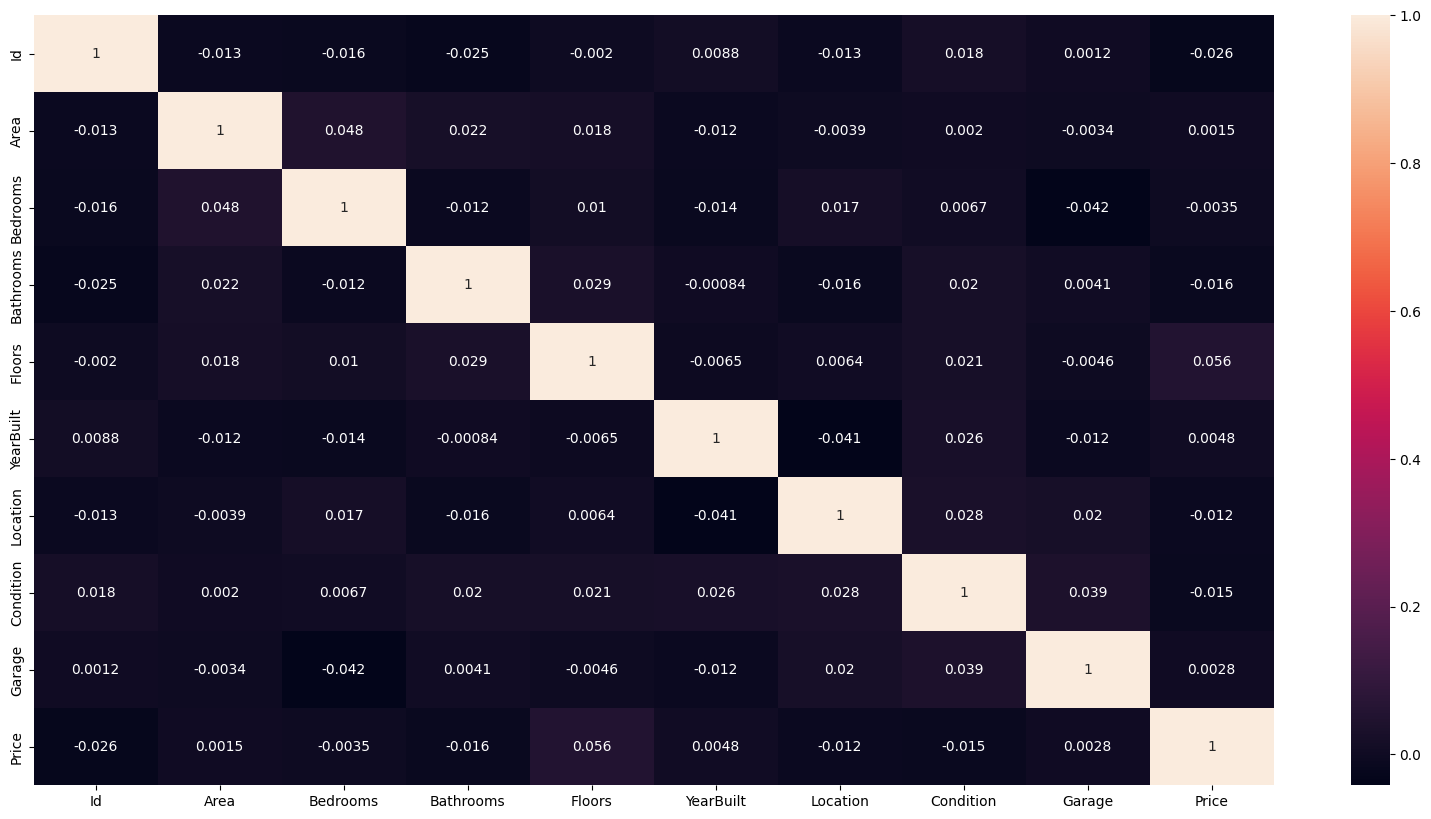

In [ ]:
correlation = house_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True)